In [101]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    """Linear Regression Model supporting Gradient Descent and Closed-Form Solution."""
    
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _mse(self, y, y_pred):
        """Compute Mean Squared Error (MSE)."""
        return np.mean((y - y_pred) ** 2)

    def fit(self, X, y):
        """Train the model using Gradient Descent."""
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros((n_features, 1))
        self.bias = np.zeros((1, 1))

        # Gradient Descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Compute and store loss
            loss = self._mse(y, y_predicted)
            self.loss_history.append(loss)

    def closed_form_solution(self, X, y):
        """Compute the closed-form solution using the Normal Equation."""
        n_samples = X.shape[0]

        # Add bias column (column of ones)
        X_b = np.c_[np.ones((n_samples, 1)), X]

        # Compute (X^T X)^(-1) X^T y
        w_closed = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

        # Extract bias and weights
        self.bias = w_closed[0]  # First element is bias
        self.weights = w_closed[1:]  # Remaining are weights

    def predict(self, X):
        """Make predictions using the trained model."""
        return np.dot(X, self.weights) + self.bias

In [102]:
class RegressionUtils:
    """Utility class for regression models: evaluation metrics and visualization."""
    
    @staticmethod
    def mean_squared_error(y, y_pred):
        """Compute Mean Squared Error (MSE)."""
        return np.mean((y - y_pred) ** 2)

    @staticmethod
    def r2_score(y, y_pred):
        """Compute R² Score."""
        y_true = y.flatten()
        y_pred = y_pred.flatten()
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    @staticmethod
    def plot_loss(loss_history):
        """Plot the loss over iterations."""
        plt.plot(loss_history)
        plt.title('Loss over Gradient Descent')
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error')
        plt.grid(True)
        plt.show()

    @staticmethod
    def plot_predictions(model, X, y):
        """Scatter plot of actual vs. predicted values, with a perfect prediction line."""
        y_pred = model.predict(X)

        # Create a perfect prediction line (y = x)
        x_line = np.linspace(y.min(), y.max(), 100)

        # Scatter plot of predicted vs. actual values
        plt.scatter(y_pred, y, color='blue', marker='x', s=20, label='Predicted vs Actual')
        plt.plot(x_line, x_line, linestyle='-', color='red', label='Perfect Prediction')

        plt.xlabel('Predicted Values')
        plt.ylabel('Actual Values')
        plt.title('Actual vs. Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Compute correlation coefficient safely
        if np.std(y_pred) == 0 or np.std(y) == 0:
            correlation = 0
        else:
            correlation = np.corrcoef(y_pred.flatten(), y.flatten())[0, 1]
        
        print(f"Prediction Correlation: {correlation:.4f}")

    @staticmethod
    def plot_residuals(model, X, y):
        """Plot residuals vs. predicted values."""
        y_pred = model.predict(X)
        residuals = y - y_pred

        # Scatter plot of residuals vs. predicted values
        plt.scatter(y_pred, residuals, color='blue', marker='x', s=20, label='Residuals')
        plt.axhline(y=0, color='red', linestyle='-', label='Zero Residual Line')

        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.title("Residuals vs. Predicted Values")
        plt.legend()
        plt.grid(True)
        plt.show()

In [103]:
import numpy as np

# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [104]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [105]:
y[:5]

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199],
       [4.71643995]])

In [106]:
# Train the model
model = LinearRegression(learning_rate=0.01, n_iters=400)
model.fit(X, y)

In [107]:
w = model.weights
w

array([[3.21421624]])

In [108]:
b = model.bias
b

array([[3.71037342]])

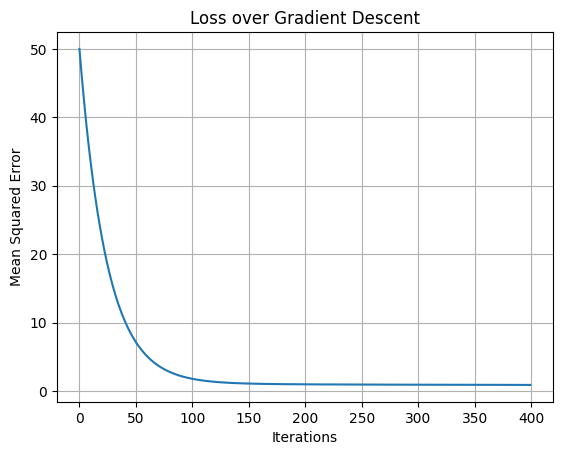

In [109]:
# Plot loss
RegressionUtils.plot_loss(model.loss_history)

In [110]:
predictions = model.predict(X)
predictions[:5]

array([[6.11807929],
       [9.82197616],
       [8.41594706],
       [7.55880907],
       [4.71332872]])

In [111]:
mse = RegressionUtils.mean_squared_error(y, predictions)
print("MSE:", mse)

accu = RegressionUtils.r2_score(y, predictions)
print("Accuracy:", accu)

MSE: 0.8832921917968494
Accuracy: 0.7473310444300556


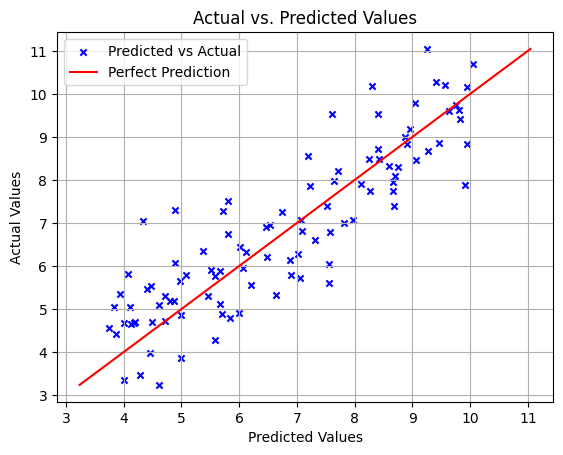

Prediction Correlation: 0.8771


In [112]:
# Plot predictions
RegressionUtils.plot_predictions(model, X, y)

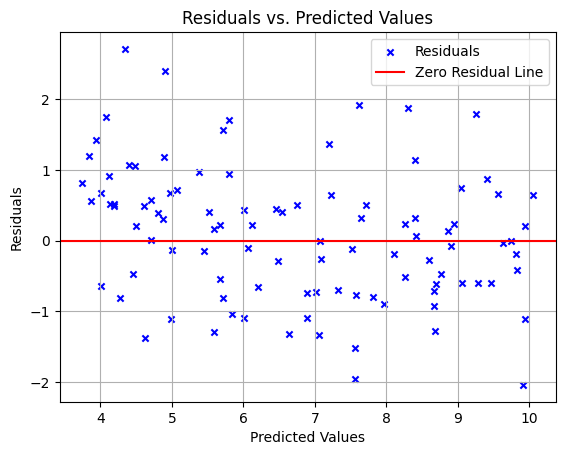

In [113]:
RegressionUtils.plot_residuals(model, X, y)

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [115]:
df = pd.read_csv("../data/ds4400_spotify.csv")
df.head()

,song_title,artist_name,duration_ms,release_year,explicit,artist_pop,track_pop
0,Nights,Frank Ocean,307151,2016,True,87,78
1,Wonderwall,Oasis,258906,1995,False,78,70
2,Color Your Night,Lotus Juice,227240,2024,False,65,65
3,Bring Em Out,T.I.,216706,2004,True,75,61
4,It's ok I'm ok,Tate McRae,156521,2024,True,84,82


In [116]:
y = df['track_pop'].values
y = np.array([y]).T
y[:5]

array([[78],
       [70],
       [65],
       [61],
       [82]])

In [117]:
df_new = df.drop(columns=['song_title', 'artist_name'])
df_new = df_new.drop(columns=['track_pop'])
df_new.head()

,duration_ms,release_year,explicit,artist_pop
0,307151,2016,True,87
1,258906,1995,False,78
2,227240,2024,False,65
3,216706,2004,True,75
4,156521,2024,True,84


In [118]:
categorical_cols = ["explicit"]
df_new['explicit'] = df_new['explicit'].astype('category')

In [119]:
numeric_cols = ['duration_ms', 'artist_pop', 'release_year']

In [120]:
onehot_X = pd.get_dummies(df_new[categorical_cols], drop_first=True, dtype = int)
categorical_X = onehot_X.to_numpy()
categorical_X[:5]

array([[1],
       [0],
       [0],
       [1],
       [1]])

In [121]:
numeric_X_scaled = preprocessing.scale(df_new[numeric_cols])
numeric_X_scaled[:5]

array([[ 0.70010333,  0.86398275,  0.22948468],
       [ 0.21383503,  0.36732201, -1.34949525],
       [-0.10533115, -0.35007684,  0.83100085],
       [-0.21150485,  0.20176843, -0.67278956],
       [-0.81811814,  0.69842917,  0.83100085]])

In [122]:
Phi = np.hstack([numeric_X_scaled, categorical_X])
Phi[:5]

array([[ 0.70010333,  0.86398275,  0.22948468,  1.        ],
       [ 0.21383503,  0.36732201, -1.34949525,  0.        ],
       [-0.10533115, -0.35007684,  0.83100085,  0.        ],
       [-0.21150485,  0.20176843, -0.67278956,  1.        ],
       [-0.81811814,  0.69842917,  0.83100085,  1.        ]])

In [123]:
# Train the model
model = LinearRegression(learning_rate=0.1, n_iters=400)
model.fit(Phi, y)

In [124]:
w = model.weights
w

array([[-0.99377435],
       [14.80654947],
       [ 1.81899331],
       [-1.46246571]])

In [125]:
b = model.bias
b

array([[61.75501693]])

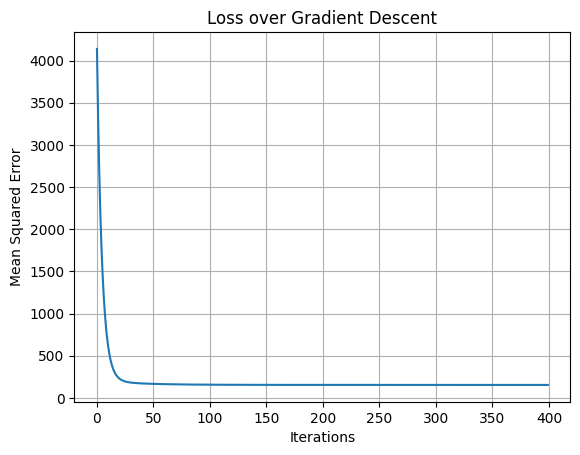

In [126]:
# Plot loss
RegressionUtils.plot_loss(model.loss_history)

In [127]:
predictions = model.predict(Phi)
predictions[:5]

array([[72.80684095],
       [64.52656182],
       [58.1878472 ],
       [62.2664338 ],
       [72.95848709]])

In [128]:
mse = RegressionUtils.mean_squared_error(y, predictions)
print("MSE:", mse)

accu = RegressionUtils.r2_score(y, predictions)
print("Accuracy:", accu)

MSE: 154.45488235257343
Accuracy: 0.5802756213685598


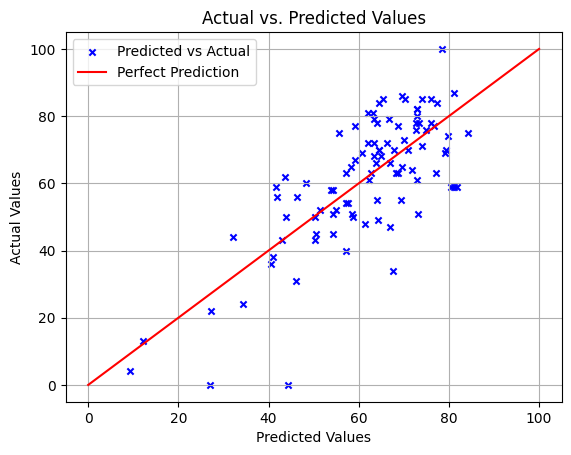

Prediction Correlation: 0.7618


In [129]:
# Plot predictions
RegressionUtils.plot_predictions(model, Phi, y)

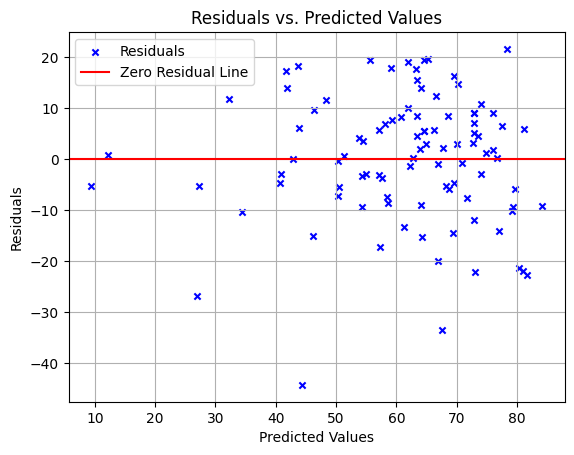

In [130]:
RegressionUtils.plot_residuals(model, Phi, y)

In [131]:
# Using Closed form solution

model.closed_form_solution(Phi, y)
w = model.weights
print(w)
b = model.bias
print(b)

[[-0.99417948]
 [14.80992468]
 [ 1.82334087]
 [-1.49938399]]
[61.76547741]
